# Annual anthrax Prediction in Ethiopia

### Project overview

##### This is a Deep-learning time series forecasting project from end-to-end, from defining the problem to training a final model and making predictions. This project is not exhaustive, but shows how you can get good results quickly by working through a time series forecasting problem systematically. The steps of this project that
#### we will work through are as follows:

###### Import the required libraries and read the dataset
###### Perform descriptive analysis
###### Data pre-processing
###### Setting date as Index
###### Setting frequency as month
###### Exploratory Data Analysis (EDA) -
###### Data Visualization
###### Set the training format
###### Reshape the input data
###### Perform train-test split

###### Define learning rate, number of epochs, and optimizer.
###### Build a sequential model with LSTM layer and dense layers
###### Fit and train the model
###### Make predictions on the test data
###### Plot the results

##### 1. Problem Description.
##### 2. Aim
##### 3. Dataset Summary and Visualization
##### 4. Data Preparation
##### 2. Test Harness.
##### 3. Persistence.
##### 4. Data Analysis.
##### 5. ARIMA Models.
##### 6. Model Validation.

### Problem framing
##### The problem is to predict annual anthrax outbreaks in Ethiopia. The dataset provides the annual anthrax outbreak in Ethiopia from 2014 to 2018, or 5 years of data. The values in data indicates the total number of cases reported during outbreaks in all adminstrative region of Ethiopia, and there are 79 observations. The dataset is credited to Ministry of Livestock and Fisheries of Ethiopia, 2020. Below is a sample of the first few rows of the dataset.

### Goal of the Project
##### To build disease progression model and to forecast the annual new cases of *Bacillus anthracis* in Livestocks by using Deep learning time series models. 

### Load Data-set and Visualization

In [1]:
import os
import numpy as np
import pandas as pd 

In [2]:
def data_load(path = "."):
    """a function to import the data into
    working environment
    ============================================== 
    ARGUMENTS: uses the path as an argument
    RETURNS:pandas dataframe
    ==============================================
    """
    if os.path.exists(path = "."):
        df = pd.read_csv(path,header= 0, parse_dates=True, squeeze = True)
        df['date'] = pd.to_datetime(df['date'])
        df
        return df
    else:
        print("File doesn't exist")

In [3]:
DATAPATH = "/home/miki/Desktop/Deployment/bacillus-anthracis/data/raw/time.csv"
df = data_load(DATAPATH)
df

,date,case
0,2014-01-31,132
1,2014-02-28,175
2,2014-03-31,240
3,2014-04-30,314
4,2014-05-31,299
5,2014-06-30,156
6,2014-07-31,253
7,2014-08-31,119
8,2014-09-30,188
9,2014-10-31,267


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    60 non-null     datetime64[ns]
 1   case    60 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.1 KB


In [5]:
def summary_statistics(x):
    """"""
    if x.dtypes == 'int64'or x.dtypes == 'float64':
        return pd.DataFrame([[x.name, np.mean(x), np.std(x), np.median(x), np.var(x), np.min(x), np.max(x)]], 
                            columns = ["Variable", "Mean", "Standard Deviation", "Median", "Variance", "Minimum", "Maximum"]).set_index("Variable")
    else:
        print("None")


In [6]:
summ = summary_statistics(df['case'])

In [7]:
summ
## slight deviation of the data from the mean indicated and hence not normally distributed 
## median less than the mean indicates the skeweness of the data toward right
## the minimum of the case is 0 and the maximum number of ifection reported is 210
## the difference between the 75% IQR and the maximum case indicates that there are a potential 
## outliers in data

,Mean,Standard Deviation,Median,Variance,Minimum,Maximum
Variable,,,,,,
case,117.866667,108.738443,82.5,11824.048889,3,442


In [8]:
df[df.index.duplicated()]

,date,case


### Data pre-processing
#### Setting date as Index & frequency as month

In [9]:
def check_index(x):
    dups = ["date", "case"]
    for dups in (x[x.index.duplicated()]):
        print('The duplications are found')
        x = x[~x.index.duplicated()]
        return x
    else:
        print('No duplication is found')
    return x

In [10]:
ts = check_index(df)

The duplications are found


In [11]:
ts

,date,case
0,2014-01-31,132
1,2014-02-28,175
2,2014-03-31,240
3,2014-04-30,314
4,2014-05-31,299
5,2014-06-30,156
6,2014-07-31,253
7,2014-08-31,119
8,2014-09-30,188
9,2014-10-31,267


In [12]:
ts.set_index('date',drop=True, inplace=True)

In [13]:
ts

,case
date,
2014-01-31,132
2014-02-28,175
2014-03-31,240
2014-04-30,314
2014-05-31,299
2014-06-30,156
2014-07-31,253
2014-08-31,119
2014-09-30,188


In [14]:
ts.index.freq = 'M'

In [15]:
ts.index.freq

<MonthEnd>

### Exploratory Data Analysis (EDA) -
#### Data Visualization

In [16]:
import warnings
import sys
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy.stats import probplot, moment
import statsmodels.api as sm
%matplotlib inline
warnings.filterwarnings('ignore')
sns.set(style='darkgrid', context='notebook', color_codes=True)

In [17]:
large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}

In [18]:
plt.rcParams.update(params)
plt.style.use('ggplot')
#sns.set_style("white")
##############################################################
def tsplots(x, title = None):
    fig, axes = plt.subplots(figsize = (18, 12), dpi = 80)
    x.plot(ax = axes)
    fig.suptitle(title, fontsize=20)
    fig.tight_layout()
    fig.subplots_adjust(top=.9)
    plt.show()

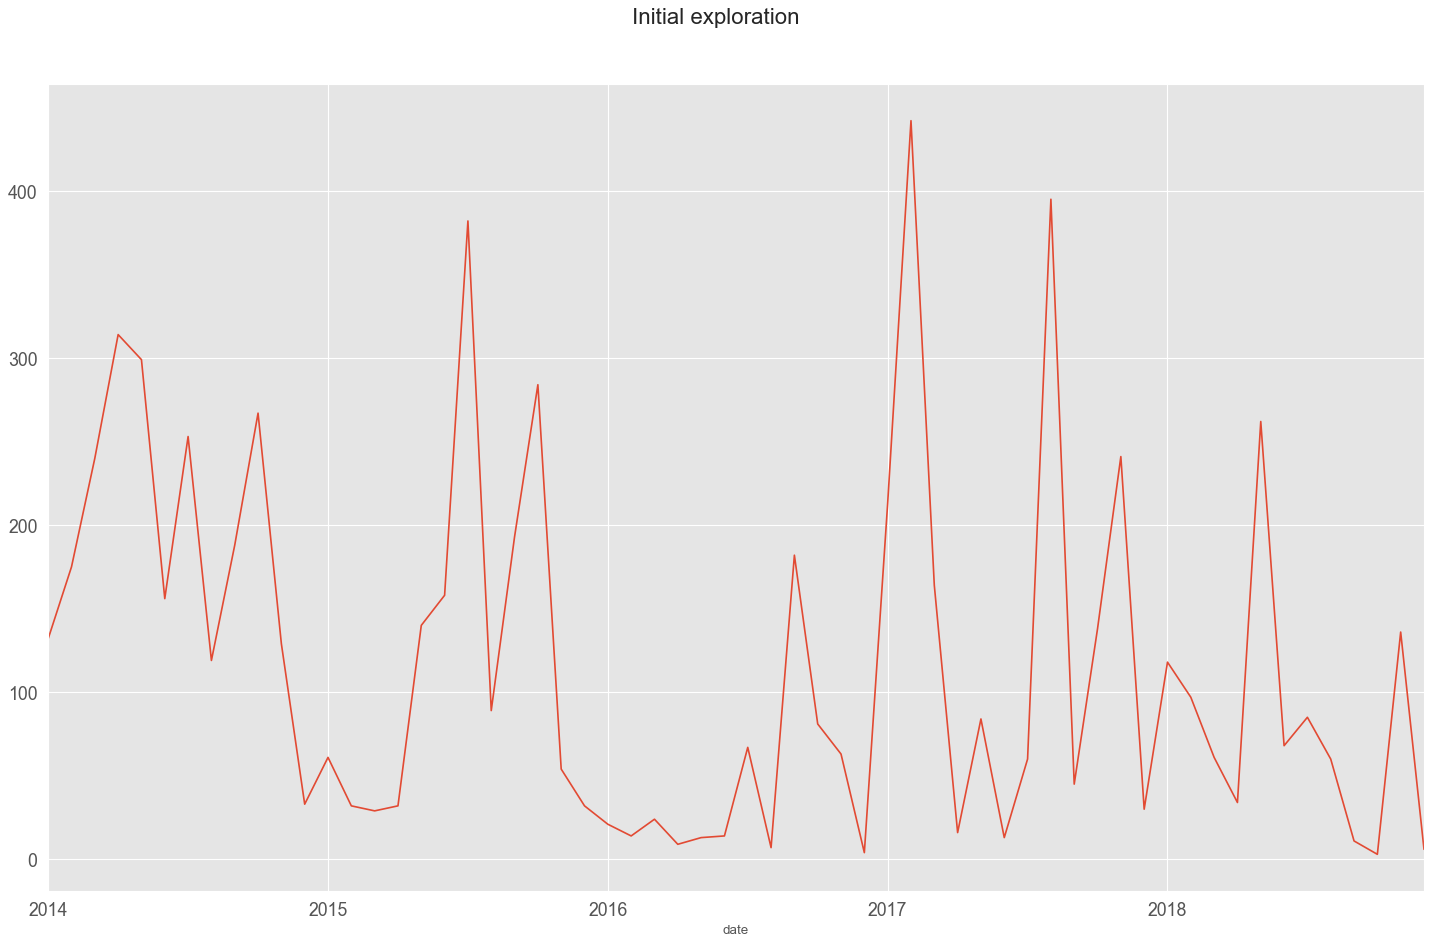

In [19]:
plots = tsplots(ts['case'],"Initial exploration")

In [20]:
ts.shape

(60, 1)

### Set the training format
#### Reshape the input data
#### Perform train-test split

In [21]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler

scaler = RobustScaler()
ts['case'] = scaler.fit_transform(np.array(ts['case']).reshape(-1, 1)) 


In [23]:
import datetime

TRAINPATH = 'train.../...'
TESTPATH = 'test.../...'
DATAPATH = "/home/miki/Desktop/Deployment/bacillus-anthracis/data/raw/" 

train_df = pd.read_csv(DATAPATH + "time.csv")

# df = pd.read_csv(train_df)
def train_test(train_df):
    """"""
    train = []
    test = []
    
    train_size = int(len(df) * 0.8)
    df_train = train_df.iloc[0:train_size], 
    df_test = train_df.iloc[train_size:len(train_df)]
    train.append(df_train)
    test.append(df_test)
    return train, test


In [24]:
train

[(          date  case
  0   2014-01-31   132
  1   2014-02-28   175
  2   2014-03-31   240
  3   2014-04-30   314
  4   2014-05-31   299
  5   2014-06-30   156
  6   2014-07-31   253
  7   2014-08-31   119
  8   2014-09-30   188
  9   2014-10-31   267
  10  2014-11-30   129
  11  2014-12-31    33
  12  2015-01-31    61
  13  2015-02-28    32
  14  2015-03-31    29
  15  2015-04-30    32
  16  2015-05-31   140
  17  2015-06-30   158
  18  2015-07-31   382
  19  2015-08-31    89
  20  2015-09-30   193
  21  2015-10-31   284
  22  2015-11-30    54
  23  2015-12-31    32
  24  2016-01-31    21
  25  2016-02-29    14
  26  2016-03-31    24
  27  2016-04-30     9
  28  2016-05-31    13
  29  2016-06-30    14
  30  2016-07-31    67
  31  2016-08-31     7
  32  2016-09-30   182
  33  2016-10-31    81
  34  2016-11-30    63
  35  2016-12-31     4
  36  2017-01-31   213
  37  2017-02-28   442
  38  2017-03-31   164
  39  2017-04-30    16
  40  2017-05-31    84
  41  2017-06-30    13
  42  2017-

In [44]:
import pandas as pd

DATA_PATH="/home/miki/Desktop/Deployment/bacillus-anthracis/data/raw/" 
train_df = pd.read_csv(DATA_PATH+'time.csv')

def create_folds():
    train_dfs=[]
    val_dfs = []
    train_size = int(len(df) * 0.8)
    df_train = train_df.iloc[0:train_size], 
    df_test = train_df.iloc[train_size:len(train_df)]
    train_dfs.append(df_train)
    val_dfs.append(df_test)
    tr = pd.DataFrame([train_dfs])
    te = pd.DataFrame([val_dfs])
    tr.to_csv(DATA_PATH + 'train.csv', index=False)
    te.to_csv(DATA_PATH + 'test.csv', index=False)
    # return train_dfs,val_dfs


In [45]:
tr = create_folds()